In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,f1_score
from sklearn.pipeline import make_pipeline


In [31]:
road = 1
direction = "out"
sus_cluster = 0
df = pd.read_csv(
    f"../dataset/newcluster/2020-02-road{road}-{direction}-5cluster.csv", parse_dates=["datetime"])
df['label'] = df['cluster'].apply(lambda row: 1 if row == sus_cluster else 0)
df


ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [ ]:
# df[df['label']==1].max(axis=0)

In [ ]:
df_corr = df.filter(['all_units','inflow_units','outflow_unit','samecell_units','avg_speed','portion_speed','max_speed','avg_traveltime','max_traveltime','cluster','label'],axis=1)
corr = df_corr.corr() 

<AxesSubplot:>

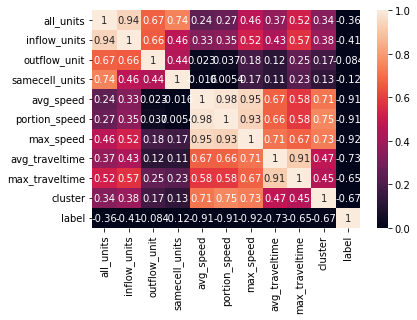

In [ ]:
sns.heatmap(corr, vmin=0, vmax=1, annot=True)


In [ ]:
num_cols = ['all_units', 'inflow_units',
            'portion_speed', 'max_speed',
            'avg_traveltime',"max_traveltime"]
num_cols

['all_units',
 'inflow_units',
 'portion_speed',
 'max_speed',
 'avg_traveltime',
 'max_traveltime']

In [ ]:
# num_cols = ['portion_speed', 'max_speed',]
# num_cols

In [ ]:
X=df[num_cols]
y=df['cluster']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
clf = GaussianNB()
clf.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_pred = clf.predict_proba(x_test)

In [ ]:
y_all = clf.predict_proba(X)

In [ ]:
problist = []
for i in y_all :
    problist.append(round(i[sus_cluster],3))

problist

[0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [ ]:
len(y_all)

23500049

In [ ]:
len(problist)

23500049

In [ ]:
df['prob'] = problist

In [ ]:
def f(row):
    if (row['cluster'] == sus_cluster) & (row['prob'] >= 0.8):
        val = 1
    else:
        val = 0
    return val

In [ ]:
df['label_with_prob'] = df.apply(f,axis=1)
    

In [ ]:
df

,datetime,road_number,km,direction,all_units,inflow_units,outflow_unit,samecell_units,avg_speed,max_speed,avg_traveltime,max_traveltime,mffs,portion_speed,inflow_units_N,outflow_units_N,cluster,label,prob,label_with_prob
0,2020-02-01 00:00:34,1,25,out,1,0,0,1,43,43,0,0,134,0.320896,0.000000,0.000000,2,0,0.0,0
1,2020-02-01 00:00:34,1,26,out,1,0,0,1,71,71,0,0,130,0.546154,0.000000,0.000000,1,0,0.0,0
2,2020-02-01 00:00:34,1,27,out,1,0,0,1,0,0,0,0,141,0.000000,0.000000,0.000000,0,1,1.0,1
3,2020-02-01 00:00:34,1,28,out,2,1,2,1,41,48,0,0,144,0.284722,0.021739,0.045455,2,0,0.0,0
4,2020-02-01 00:00:34,1,29,out,3,3,4,0,75,108,0,0,121,0.619835,0.065217,0.090909,4,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23500044,2020-02-29 23:59:14,1,925,out,0,0,1,0,0,0,0,0,119,0.000000,0.000000,0.022727,0,1,1.0,1
23500045,2020-02-29 23:59:14,1,926,out,1,1,0,0,51,51,60,60,107,0.476636,0.021739,0.000000,1,0,0.0,0
23500046,2020-02-29 23:59:14,1,939,out,1,0,0,1,57,57,0,0,99,0.575758,0.000000,0.000000,4,0,0.0,0
23500047,2020-02-29 23:59:14,1,953,out,0,0,1,0,0,0,0,0,121,0.000000,0.000000,0.022727,0,1,1.0,1


In [ ]:
y_pred.mean()

0.19999999999999926

In [ ]:
clf.classes_

array([0, 1, 2, 3, 4], dtype=int64)

In [ ]:
# tree = DecisionTreeClassifier()
# tree.fit(x_train, y_train)

In [ ]:
# y_pred = tree.predict(x_test)

In [ ]:
# print(classification_report(y_test,y_pred))

In [ ]:
# print(accuracy_score(y_test, y_pred))

In [ ]:
# conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
# from mlxtend.plotting import plot_confusion_matrix
# fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
# plt.xlabel('Predictions', fontsize=18)
# plt.ylabel('Actuals', fontsize=18)
# plt.title('Confusion Matrix', fontsize=18)
# plt.show()

In [ ]:
# import joblib
# joblib.dump(tree, f"DecisionTreeModelRoad{road}{direction}.joblib")


In [ ]:
import joblib
joblib.dump(clf, f"GaussianNBModelRoad{road}{direction}.joblib")

['GaussianNBModelRoad1out.joblib']